In [7]:
import sys
import os
import matplotlib.pyplot as plt
% matplotlib notebook
import pickle
# Import class
parent_dir = os.path.dirname(os.path.dirname(os.getcwd()))
class_dir = os.path.join(parent_dir, 'Scripts')
sys.path.insert(0, class_dir)
import NBAStats
import datetime as dt
import numpy as np
import pandas as pd

In [8]:
stats_file = os.path.join(parent_dir, 'Data', 'nba_stats.pickle')
print(stats_file)
nba_stats = pickle.load(open(stats_file, 'rb'))

C:\Users\johnn\Desktop\github\nba_stats\Data\nba_stats.pickle


In [9]:
dates_recorded = nba_stats.get_games()['GAME_DATE'].unique()
df_dates_recorded = pd.DataFrame(dates_recorded, columns=['game_date'])

df_dates_recorded['game_date'] = df_dates_recorded['game_date'].apply(lambda date: dt.datetime.strptime(date[:10], '%Y-%m-%d'))
df_dates_recorded['recorded'] = 1

In [10]:
earliest_date = min(df_dates_recorded['game_date'])
latest_date = max(df_dates_recorded['game_date'])
print('Data from {} to {}'.format(earliest_date, latest_date))

Data from 2012-04-29 00:00:00 to 2019-01-03 00:00:00


In [11]:
df_all_days = pd.DataFrame(pd.date_range(start=earliest_date, end=latest_date), columns=['date'])
df_ind = df_all_days.merge(df_dates_recorded, how='left', left_on='date', right_on='game_date').set_index('date')
mask_not_rec = pd.isnull(df_ind['game_date'])
df_ind['recorded'][mask_not_rec] = 0

C:\Users\johnn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


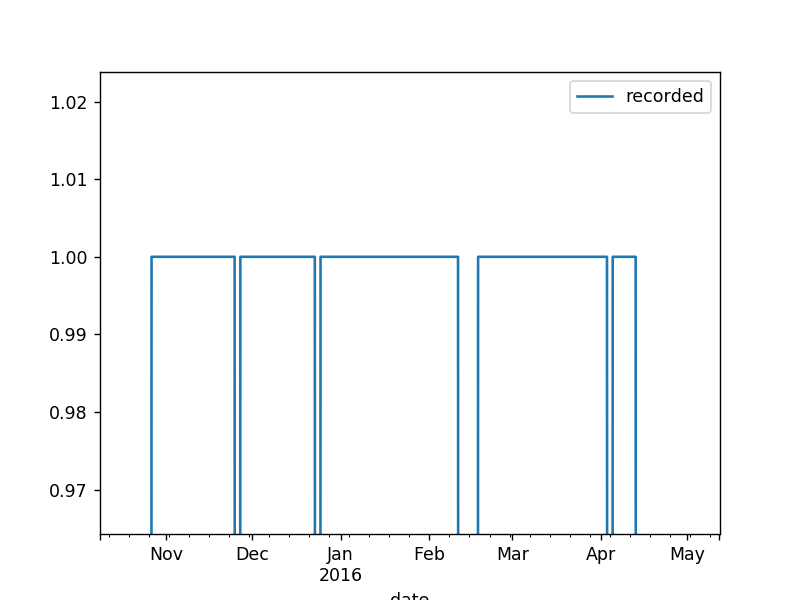

In [12]:
df_ind.plot(y='recorded')